#Υπολογιστική Γεωμετρία

###Υπολογιστική Εργασία Σεπτεμβρίου

###Αλατζάς Αλέξανδρος - 1115201900005

#**Υλοποίηση Α**

Θα ορίσουμε μια κλάση που αναπαριστά τα σημεία στο επίπεδο για διευκόλυνση της υλοποίησης.

In [29]:
# Αναπαράσταση σημείου σε 2D
class Point:
    def __init__(self, x, y, name=''):
        self.x = x
        self.y = y
        self.name = name

    def __getitem__(self, index):
        if index == 0:
            return self.x
        elif index == 1:
            return self.y
        elif index == 2:
            return self.name
        else:
            raise IndexError("Point class has only three elements (x, y, and name).")

    def __setitem__(self, index, value):
        if index == 0:
            self.x = value
        elif index == 1:
            self.y = value
        elif index == 2:
            self.name = value
        else:
            raise IndexError("Point class has only three elements (x, y, and name).")

    def __repr__(self):
        return f"{self.name} ({self.x}, {self.y})"

In [30]:
# Δημιουργία 10 σημείων από την εφαρμογή διαφανειών (Μάθημα 02, Σελ.13)
points = [Point(-10, 5, 'p1'), Point(-2, -10, 'p2'), Point(1, 7, 'p3'), Point(3, 4, 'p4'), Point(5, 6, 'p5'), Point(9, 3, 'p6'), Point(11, 8, 'p7'), Point(15, -11, 'p8'), Point(18,-3, 'p9'), Point(24,-8, 'p10')]

Το κατηγόρημα προσανατολισμού

In [31]:
# Υπολογισμός προσανατολισμού (0 συνευθειακά, + αριστερόστροφα(ccw), - δεξιόστροφα(cw))
def orientation(a, b, c):
    res = (b[1]-a[1]) * (c[0]-b[0]) - (c[1]-b[1]) * (b[0]-a[0])
    if res == 0: # Συνευθειακά σημεία
        return 0
    if res > 0: # Αριστερόστροφα (Counter Clockwise)
        return 1
    return -1 # Δεξιόστροφα (Clockwise)

## Αυξητικός Αλγόριθμος

In [32]:
# Υλοποίηση του Αυξητικού αλγορίθμου
def incremental_algorithm(points):
    n = len(points)
    if n < 3:
        return points # Το κυρτό περίβλημα δεν υπολογίζεται για λιγότερα από 3 σημεία

    points.sort(key=lambda p: (p[0], p[1])) # Διατάσσουμε τα σημεία
    upper_hull = []
    lower_hull = []

    # Υπολογίζουμε τον κατάλογο Lάνω
    for i in range(n):
        while len(upper_hull) >= 2 and orientation(upper_hull[-2], upper_hull[-1], points[i]) >= 0:
            upper_hull.pop()
        upper_hull.append(points[i])

    # Υπολογίζουμε τον κατάλογο Lκάτω
    for i in range(n - 2, -1, -1):
        while len(lower_hull) >= 2 and orientation(lower_hull[-2], lower_hull[-1], points[i]) >= 0:
            lower_hull.pop()
        lower_hull.append(points[i])

    convex_hull = upper_hull + lower_hull[1:-1] # Κόβουμε από τον Lκάτω τις διπλές καταχωρήσεις

    return convex_hull

Γραφική αναπαράσταση σημείων

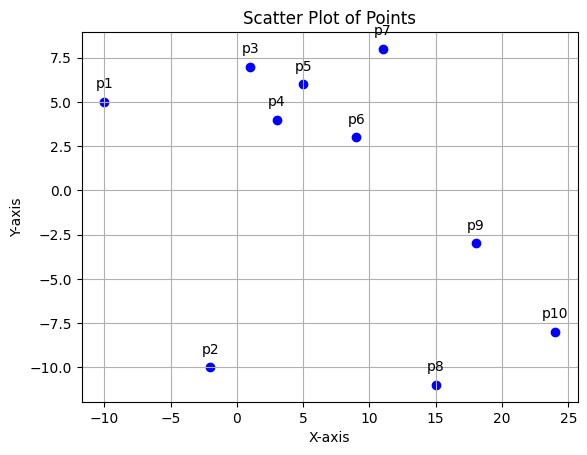

In [33]:
import matplotlib.pyplot as plt

# Εξάγουμε συντεταγμένες από τα σημεία
x_coords = [point.x for point in points]
y_coords = [point.y for point in points]

# Σχηματίζουμε τη γραφική
plt.scatter(x_coords, y_coords, c='blue')

# Αντιστοιχούμε τα ονόματα των σημείων με τις συντεταγμένες τους
for point in points:
    plt.annotate(point.name, (point.x, point.y), textcoords="offset points", xytext=(0,10), ha='center')

# Ονοματίζουμε άξονες και τίτλο
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.title('Scatter Plot of Points')

# Εμφάνιση γραφικής
plt.grid(True)
plt.show()

In [34]:
# Παράδειγμα χρήσης με εφαρμογή διαφανειών (Μάθημα 02, Σελ.13)
result = incremental_algorithm(points)
for point in result:
    print(point)

p1 (-10, 5)
p2 (-2, -10)
p8 (15, -11)
p10 (24, -8)
p7 (11, 8)
p3 (1, 7)


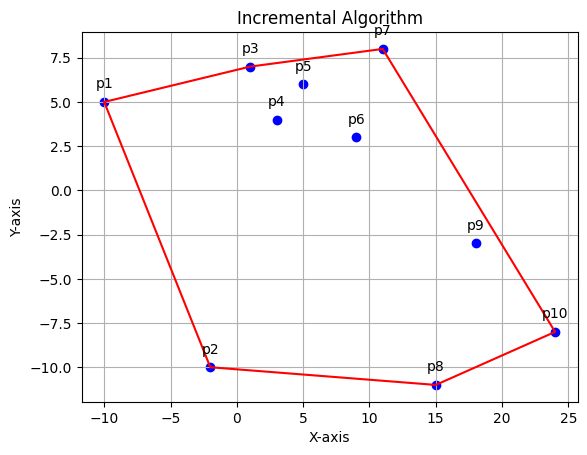

In [35]:
# Εμφανίζουμε τα σημεία
plt.scatter(x_coords, y_coords, c='blue')
for point in points:
    plt.annotate(point.name, (point.x, point.y), textcoords="offset points", xytext=(0,10), ha='center')


# Εξάγουμε τις συντεταγμένες των σημείων του κυρτού περιβλήματος
result_x = [point[0] for point in result]
result_y = [point[1] for point in result]

# Σχεδιάζουμε τις γραμμές του περιβλήματος
result_x.append(result_x[0])
result_y.append(result_y[0])
plt.plot(result_x, result_y, color='red')

# Εμφάνιση γραφικής
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.title('Incremental Algorithm')
plt.grid(True)
plt.show()

## Αλγόριθμος περιτυλίγματος

In [36]:
# Υλοποίηση Αλγορίθμου Jarvis march (περιτυλίγματος)
def jarvis_march(points):
    n = len(points)
    if n < 3:
        # Το κυρτό περίβλημα δεν υπολογίζεται για λιγότερα από 3 σημεία
        return points

    points.sort(key=lambda p: (p[0], p[1])) # Διατάσσουμε τα σημεία

    # Εντοπίζουμε το αριστερότερο σημείο
    leftmost = min(points, key=lambda p: p[0])

    hull = []
    current_point = leftmost
    while True:
        hull.append(current_point)

        # Αρχικοποιούμε το επόμενο σημείο του περιβλήματος να είναι το πρώτο σημείο του συνόλου
        next_point = Point(current_point[0], current_point[1])

        for point in points:
            # Βρίσκουμε το επόμενο σημείο που σχηματίζει το κυρτό περίβλημα
            if point == current_point:
                continue
            direction = orientation(current_point, next_point, point)
            if direction == -1 or (direction == 0 and (
                    (point[0] - current_point[0]) ** 2 + (point[1] - current_point[1]) ** 2 >
                    (next_point[0] - current_point[0]) ** 2 + (next_point[1] - current_point[1]) ** 2)):
                next_point = point

        current_point = next_point

        # Έλεγχος αν φτάσαμε πίσω στο αριστερότερο σημείο
        if current_point == leftmost:
            break

    return hull

p1 (-10, 5)
p3 (1, 7)
p7 (11, 8)
p10 (24, -8)
p8 (15, -11)
p2 (-2, -10)


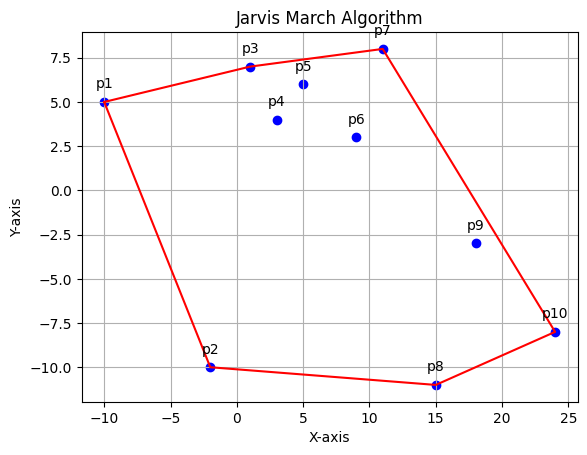

In [37]:
# Παράδειγμα χρήσης με εφαρμογή διαφανειών (Μάθημα 02, Σελ.13)
result = jarvis_march(points)
for point in result:
    print(point)

# Εμφανίζουμε τα σημεία
plt.scatter(x_coords, y_coords, c='blue')
for point in points:
    plt.annotate(point.name, (point.x, point.y), textcoords="offset points", xytext=(0,10), ha='center')


# Εξάγουμε τις συντεταγμένες των σημείων του κυρτού περιβλήματος
result_x = [point[0] for point in result]
result_y = [point[1] for point in result]

# Σχεδιάζουμε τις γραμμές του περιβλήματος
result_x.append(result_x[0])
result_y.append(result_y[0])
plt.plot(result_x, result_y, color='red')

# Εμφάνιση γραφικής
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.title('Jarvis March Algorithm')
plt.grid(True)
plt.show()

## Αλγόριθμος Διαίρει και Βασίλευε

In [38]:
# Υλοποίηση Αλγορίθμου Διαίρει και Βασίλευε για εύρεση κυρτού περιβλήματος
from functools import cmp_to_key

# Αποθηκεύουμε το κέντρο ως global για να το χρησιμοποιήσουμε στην συνάρτηση σύγκρισης
mid = [0, 0]

# Συνάρτηση που καθορίζει το τεταρτημόριο
def quad(p):
    if p[0] >= 0 and p[1] >= 0:
        return 1
    if p[0] <= 0 and p[1] >= 0:
        return 2
    if p[0] <= 0 and p[1] <= 0:
        return 3
    return 4

# Συνάρτηση σύγκρισης για ταξινόμηση
def compare(p1, q1):
    p = [p1[0]-mid[0], p1[1]-mid[1]]
    q = [q1[0]-mid[0], q1[1]-mid[1]]
    one = quad(p)
    two = quad(q)

    if one != two:
        if one < two:
            return -1
        return 1
    if p[1]*q[0] < q[1]*p[0]:
        return -1
    return 1

# Βρίσκουμε την άνω εφαπτομένη δύο πολυγώνων που αντιπροσωπεύονται ως διανύσματα
def merger(a, b):
    # n1 -> αριθμός σημείων στο πολύγωνο a
    # n2 -> αριθμός σημείων στο πολύγωνο b
    n1, n2 = len(a), len(b)
    ia, ib = 0, 0

    # ia -> δεξιότερο σημείο του a
    for i in range(1, n1):
        if a[i][0] > a[ia][0]:
            ia = i

    # ib -> αριστερότερο σημείο του b
    for i in range(1, n2):
        if b[i][0] < b[ib][0]:
            ib = i
    # Υπολογισμός άνω εφαπτομένης
    inda, indb = ia, ib
    done = 0
    while not done:
        done = 1
        while orientation(b[indb], a[inda], a[(inda+1) % n1]) >= 0:
            inda = (inda + 1) % n1

        while orientation(a[inda], b[indb], b[(n2+indb-1) % n2]) <= 0:
            indb = (indb - 1) % n2
            done = 0

    uppera, upperb = inda, indb
    inda, indb = ia, ib
    done = 0
    g = 0
    while not done: # Υπολογισμός κάτω εφαπτομένης
        done = 1
        while orientation(a[inda], b[indb], b[(indb+1) % n2]) >= 0:
            indb = (indb + 1) % n2

        while orientation(b[indb], a[inda], a[(n1+inda-1) % n1]) <= 0:
            inda = (inda - 1) % n1
            done = 0

    ret = []
    lowera, lowerb = inda, indb
    # Στη λίστα ret περιέχεται το κυρτό περίβλημα μετά την ένωση των δύο κυρτών περιβλημάτων
    # με τα σημεία ταξινομημένα με φορά προς τα αριστερά
    ind = uppera
    ret.append(a[uppera])
    while ind != lowera:
        ind = (ind+1) % n1
        ret.append(a[ind])

    ind = lowerb
    ret.append(b[lowerb])
    while ind != upperb:
        ind = (ind+1) % n2
        ret.append(b[ind])
    return ret

# Αλγόριθμος brute force για εύρεση κυρτού περιβλήματος συνόλου 6 ή λιγότερων σημείων
def bruteHull(a):
    # Παίρνουμε οποιοδήποτε ζευγάρι σημείων και ελέγχουμε αν είναι άκρη
    # κυρτού περιβλήματος ή όχι. Αν όλα τα άλλα σημεία βρίσκονται στην
    # ίδια πλευρά της γραμμής, τότε η γραμμή είναι η άκρη του κυρτού
    # περιβλήματος. Αλλιώς δεν είναι άκρη.
    global mid
    s = set()
    for i in range(len(a)):
        for j in range(i+1, len(a)):
            x1, x2 = a[i][0], a[j][0]
            y1, y2 = a[i][1], a[j][1]
            a1, b1, c1 = y1-y2, x2-x1, x1*y2-y1*x2
            pos, neg = 0, 0
            for k in range(len(a)):
                if (k == i) or (k == j) or (a1*a[k][0]+b1*a[k][1]+c1 <= 0):
                    neg += 1
                if (k == i) or (k == j) or (a1*a[k][0]+b1*a[k][1]+c1 >= 0):
                    pos += 1
            if pos == len(a) or neg == len(a):
                s.add(tuple(a[i]))
                s.add(tuple(a[j]))

    ret = []
    for x in s:
        ret.append(list(x))

    # Ταξινομούμε τα σημεία αριστερόστροφα
    mid = [0, 0]
    n = len(ret)
    for i in range(n):
        mid[0] += ret[i][0]
        mid[1] += ret[i][1]
        ret[i][0] *= n
        ret[i][1] *= n
    ret = sorted(ret, key=cmp_to_key(compare))
    for i in range(n):
        ret[i] = [round(ret[i][0]/n), round(ret[i][1]/n), ret[i][2]]
    return ret

# Συνάρτηση που επιστρέφει το κυρτό περίβλημα των δοσμένων σημείων
def divide(a):
    # Αν ο αριθμός των σημείων είναι μικρότερος από 6 τότε
    # η συνάρτηση χρησιμοποιεί τον brute force αλγόριθμο
    if len(a) <= 5:
        return bruteHull(a)

    # Χωρίζουμε τα σημεία στη μέση σε αριστερά και δεξιά
    left, right = [], []
    start = int(len(a)/2)
    for i in range(start):
        left.append(a[i])
    for i in range(start, len(a)):
        right.append(a[i])

    # Υπολογισμός κυρτού περιβλήματος για το αριστερό και
    # το δεξί σύνολο σημείων
    left_hull = divide(left)
    right_hull = divide(right)

    # Επισύναψη των δύο κυρτών περιβλημάτων
    return merger(left_hull, right_hull)

p3 (1, 7)
p1 (-10, 5)
p2 (-2, -10)
p8 (15, -11)
p10 (24, -8)
p7 (11, 8)


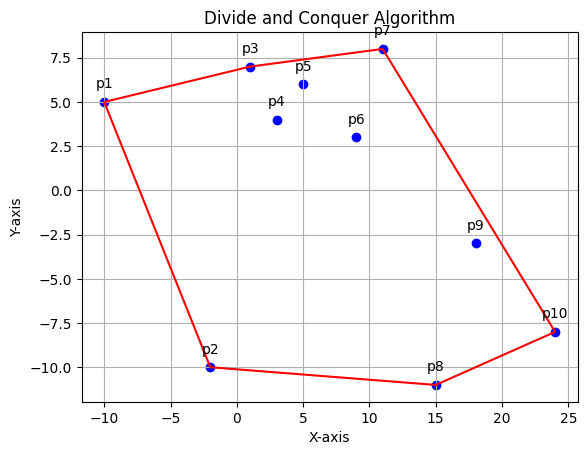

In [39]:
# Παράδειγμα χρήσης με εφαρμογή διαφανειών (Μάθημα 02, Σελ.13)
ans = divide(points)

for point in ans:
    print(point[2], tuple(point[:2]))

# Εμφανίζουμε τα σημεία
plt.scatter(x_coords, y_coords, c='blue')
for point in points:
    plt.annotate(point.name, (point.x, point.y), textcoords="offset points", xytext=(0,10), ha='center')


# Εξάγουμε τις συντεταγμένες των σημείων του κυρτού περιβλήματος
result_x = [point[0] for point in ans]
result_y = [point[1] for point in ans]

# Σχεδιάζουμε τις γραμμές του περιβλήματος
result_x.append(result_x[0])
result_y.append(result_y[0])
plt.plot(result_x, result_y, color='red')

# Εμφάνιση γραφικής
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.title('Divide and Conquer Algorithm')
plt.grid(True)
plt.show()

## Αλγόριθμος Quickhull

Σημείωση: δουλεύει, άλλαξε σχόλια, 2 σημεια τα δινει αναποδα ισως ειναι bug(mallon kalo einai apla grapsto ws sxolio)

p10 (24, -8)
p7 (11, 8)
p3 (1, 7)
p1 (-10, 5)
p2 (-2, -10)
p8 (15, -11)


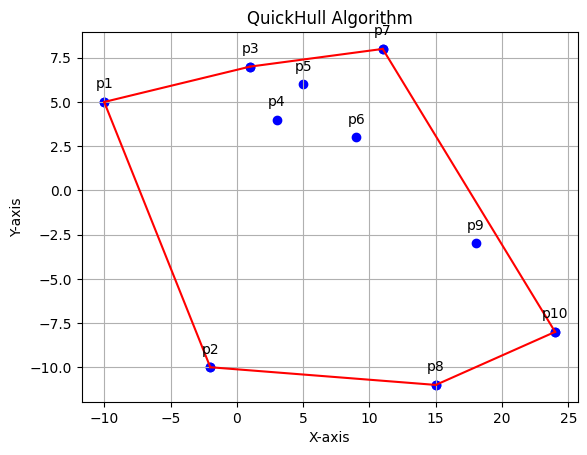

In [40]:
# Παράδειγμα χρήσης με εφαρμογή διαφανειών (Μάθημα 02, Σελ.13)
import numpy as np
from scipy.spatial import ConvexHull

points_array = np.array([[point.x, point.y] for point in points])

hull = ConvexHull(points_array)
# Get the indices of the vertices that form the convex hull
hull_indices = hull.vertices

for index in hull_indices:
    print(points[index])

# Get the points on the convex hull
convex_hull_points = points_array[hull_indices]

# Εμφανίζουμε τα σημεία
plt.scatter(x_coords, y_coords, c='blue')
for point in points:
    plt.annotate(point.name, (point.x, point.y), textcoords="offset points", xytext=(0,10), ha='center')

plt.scatter(convex_hull_points[:, 0], convex_hull_points[:, 1], c='blue', label='Convex Hull Points')

# Σχεδιάζουμε γραμμές μεταξύ των κορυφών
for i in range(len(hull_indices) - 1):
    plt.plot([convex_hull_points[i, 0], convex_hull_points[i + 1, 0]],
             [convex_hull_points[i, 1], convex_hull_points[i + 1, 1]], 'r-')

# Συνδέουμε την τελευταία και την πρώτη κορυφή του πολυγώνου
plt.plot([convex_hull_points[-1, 0], convex_hull_points[0, 0]],
         [convex_hull_points[-1, 1], convex_hull_points[0, 1]], 'r-')

plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.grid(True)
plt.title('QuickHull Algorithm')
plt.show()

## Κυρτό περίβλημα σε 3 διαστάσεις (quickhull)

Points in the Convex Hull:
[0.43758721 0.891773   0.96366276]
[0.56804456 0.92559664 0.07103606]
[0.0871293  0.0202184  0.83261985]
[0.77815675 0.87001215 0.97861834]
[0.79915856 0.46147936 0.78052918]
[0.11827443 0.63992102 0.14335329]
[0.94466892 0.52184832 0.41466194]


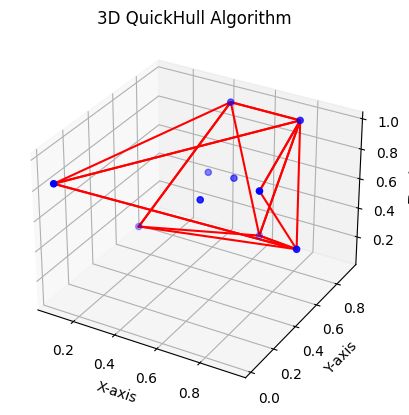

In [41]:
from mpl_toolkits.mplot3d import Axes3D

# Δημιουργούμε 10 νέα τυχαία σημεία
np.random.seed(0) # Σταθερό seed για το ίδιο αποτέλεσμα (ακυρώνουμε προσωρινά την τυχαιότητα)
points3d = np.random.rand(10, 3)

# Υπολογισμός του κυρτού περιβλήματος
hull = ConvexHull(points3d)

# Σχεδιάζουμε τα τρισδιάστατα σημεία και το κυρτό περίβλημα
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

ax.scatter(points3d[:, 0], points3d[:, 1], points3d[:, 2], c='blue', marker='o')

for simplex in hull.simplices:
    simplex_points = points3d[simplex]
    ax.plot3D(simplex_points[:, 0], simplex_points[:, 1], simplex_points[:, 2], 'r-')

print("Points in the Convex Hull:")
for vertex in hull.vertices:
    print(points3d[vertex])

# Ορίζουμε τους άξονες και τον τίτλο
ax.set_xlabel('X-axis')
ax.set_ylabel('Y-axis')
ax.set_zlabel('Z-axis')
plt.title('3D QuickHull Algorithm')

# Εμφάνιση γραφικής
plt.show()

#**Εφαρμογή Α**

## 1) Θεωρούμε 100 τυχαία σημεία στο επίπεδο

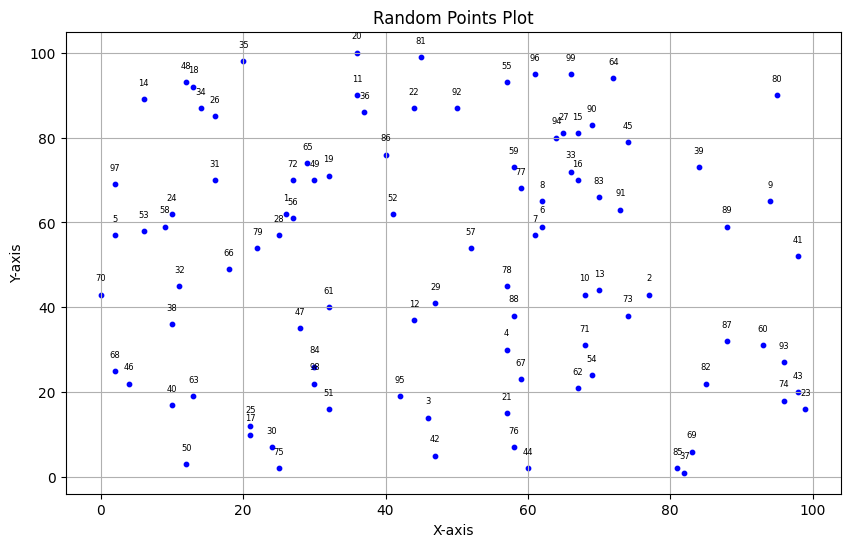

In [42]:
# Συνάρτηση παραγωγής τυχαίων σημείων
def generate_random_points(num_points, x_min, x_max, y_min, y_max):
    x_coords = np.random.uniform(x_min, x_max, num_points)
    y_coords = np.random.uniform(y_min, y_max, num_points)
    names = [i for i in range(1, num_points)]

    # Στρογγυλοποίηση συντεταγμένων
    x_coords = np.round(x_coords, decimals=0)
    y_coords = np.round(y_coords, decimals=0)

    points = list(zip(x_coords, y_coords, names))
    return points

# Ορισμός των διαστημάτων των συντεταγμένων
x_min, x_max = 0, 100
y_min, y_max = 0, 100

# Δημιουργία των τυχαίων σημείων
num_points = 100
random_points = generate_random_points(num_points, x_min, x_max, y_min, y_max)

# Διαχωρίζουμε τις συντεταγμένες y και x
x_coords, y_coords, names = zip(*random_points)

# Γραφική αναπαράσταση των σημείων
plt.figure(figsize=(10,6))
plt.scatter(x_coords, y_coords, s=10, c='blue', marker='o')
for i, name in enumerate(names):
    plt.annotate(name, (x_coords[i], y_coords[i]), textcoords="offset points", xytext=(0,10), ha='center', fontsize=6)
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.title('Random Points Plot')
plt.grid(True)
plt.show()

##(α΄) Βρίσκουμε το κυρτό περίβλημα αυτών των σημείων χρησιμοποιώντας τους παραπάνω αλγορίθμους και παρουσιάζουμε τα αποτελέσματα σαν λίστα σημείων και σχηματικά

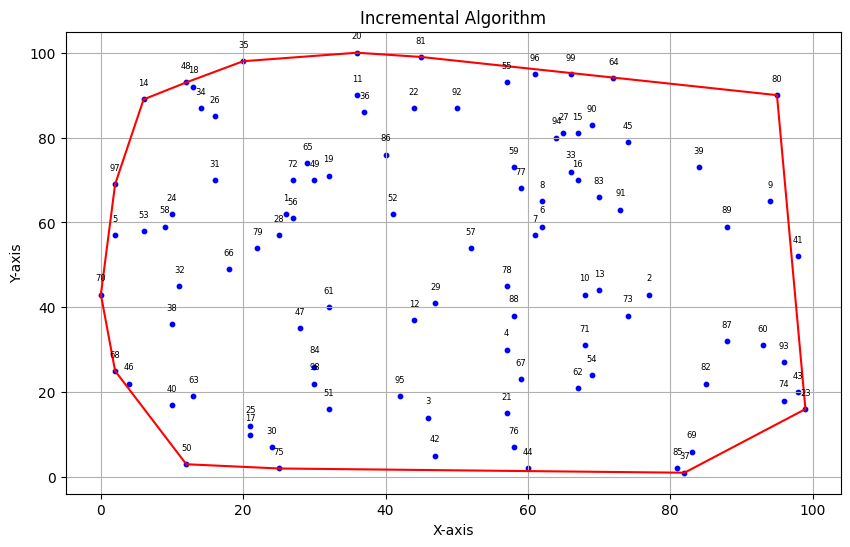

Convex Hull Points:
point 70 (0.0, 43.0)
point 68 (2.0, 25.0)
point 50 (12.0, 3.0)
point 75 (25.0, 2.0)
point 37 (82.0, 1.0)
point 23 (99.0, 16.0)
point 80 (95.0, 90.0)
point 81 (45.0, 99.0)
point 20 (36.0, 100.0)
point 35 (20.0, 98.0)
point 48 (12.0, 93.0)
point 14 (6.0, 89.0)
point 97 (2.0, 69.0)


In [43]:
# Αυξητικός αλγόριθμος
result = incremental_algorithm(random_points)

# Εξάγουμε συντεταγμένες από τα σημεία
x_coords, y_coords, names = zip(*random_points)

# Σχηματίζουμε τη γραφική

# Ονοματίζουμε άξονες και τίτλο
plt.figure(figsize=(10,6))
plt.scatter(x_coords, y_coords, s=10, c='blue', marker='o')
for i, name in enumerate(names):
    plt.annotate(name, (x_coords[i], y_coords[i]), textcoords="offset points", xytext=(0,10), ha='center', fontsize=6)
plt.xlabel('X Coordinates')
plt.ylabel('Y Coordinates')
plt.title('Random Points Plot')

# Εξάγουμε τις συντεταγμένες των σημείων του κυρτού περιβλήματος
result_x = [point[0] for point in result]
result_y = [point[1] for point in result]
result_names = [point[2] for point in result]

# Σχεδιάζουμε τις γραμμές του περιβλήματος
result_x.append(result_x[0])
result_y.append(result_y[0])
result_names.append(result_names[0])

# Σχεδιάζουμε τις γραμμές του περιβλήματος
plt.plot(result_x, result_y, color='red')

# Εμφάνιση γραφικής
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.title('Incremental Algorithm')
plt.grid(True)
plt.show()

print('Convex Hull Points:')
for point in result:
    print('point', point[2], point[:2])

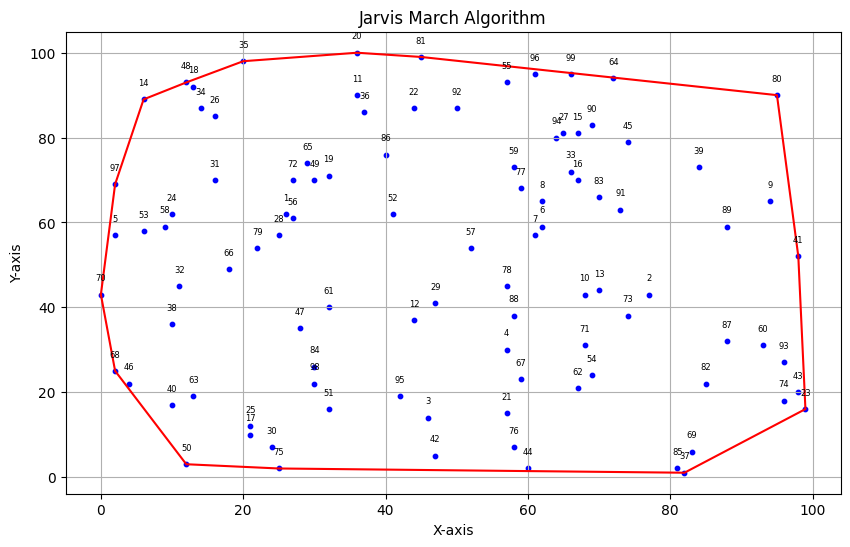

Convex Hull Points:
point 70 (0.0, 43.0)
point 97 (2.0, 69.0)
point 14 (6.0, 89.0)
point 48 (12.0, 93.0)
point 35 (20.0, 98.0)
point 20 (36.0, 100.0)
point 81 (45.0, 99.0)
point 80 (95.0, 90.0)
point 41 (98.0, 52.0)
point 23 (99.0, 16.0)
point 37 (82.0, 1.0)
point 75 (25.0, 2.0)
point 50 (12.0, 3.0)
point 68 (2.0, 25.0)


In [44]:
# Αλγόριθμος περιτυλίγματος
result = jarvis_march(random_points)

# Εξάγουμε συντεταγμένες από τα σημεία
x_coords, y_coords, names = zip(*random_points)

# Σχηματίζουμε τη γραφική

# Ονοματίζουμε άξονες και τίτλο
plt.figure(figsize=(10,6))
plt.scatter(x_coords, y_coords, s=10, c='blue', marker='o')
for i, name in enumerate(names):
    plt.annotate(name, (x_coords[i], y_coords[i]), textcoords="offset points", xytext=(0,10), ha='center', fontsize=6)
plt.xlabel('X Coordinates')
plt.ylabel('Y Coordinates')
plt.title('Random Points Plot')

# Εξάγουμε τις συντεταγμένες των σημείων του κυρτού περιβλήματος
result_x = [point[0] for point in result]
result_y = [point[1] for point in result]
result_names = [point[2] for point in result]

# Σχεδιάζουμε τις γραμμές του περιβλήματος
result_x.append(result_x[0])
result_y.append(result_y[0])
result_names.append(result_names[0])

# Σχεδιάζουμε τις γραμμές του περιβλήματος
plt.plot(result_x, result_y, color='red')

# Εμφάνιση γραφικής
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.title('Jarvis March Algorithm')
plt.grid(True)
plt.show()

print('Convex Hull Points:')
for point in result:
    print('point', point[2], point[:2])

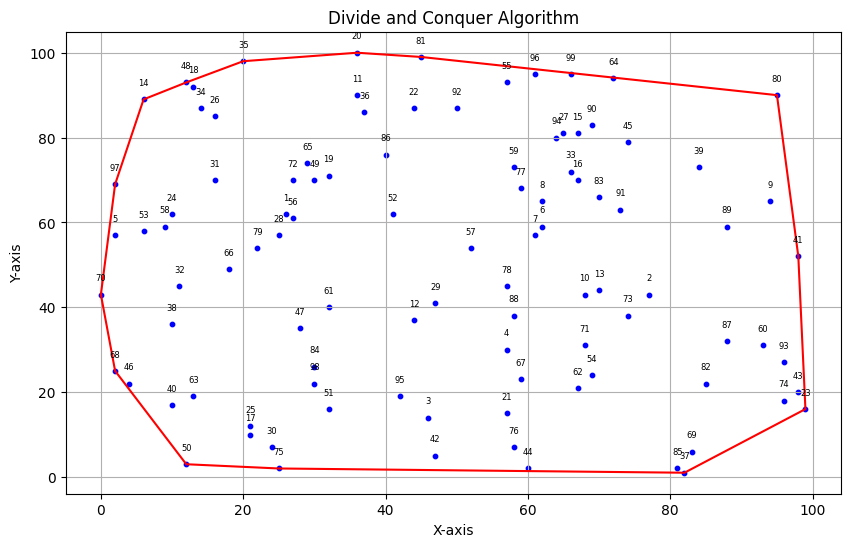

Convex Hull Points:
point 81 [45, 99]
point 20 [36, 100]
point 35 [20, 98]
point 48 [12, 93]
point 14 [6, 89]
point 97 [2, 69]
point 70 [0, 43]
point 68 [2, 25]
point 50 [12, 3]
point 75 [25, 2]
point 37 [82, 1]
point 23 [99, 16]
point 41 [98, 52]
point 80 [95, 90]


In [45]:
# Διαίρει και Βασίλευε
result = divide(random_points)

# Σχηματίζουμε τη γραφική

# Ονοματίζουμε άξονες και τίτλο
plt.figure(figsize=(10,6))
plt.scatter(x_coords, y_coords, s=10, c='blue', marker='o')
for i, name in enumerate(names):
    plt.annotate(name, (x_coords[i], y_coords[i]), textcoords="offset points", xytext=(0,10), ha='center', fontsize=6)
plt.xlabel('X Coordinates')
plt.ylabel('Y Coordinates')
plt.title('Random Points Plot')

# Εξάγουμε τις συντεταγμένες των σημείων του κυρτού περιβλήματος
result_x = [point[0] for point in result]
result_y = [point[1] for point in result]

# Σχεδιάζουμε τις γραμμές του περιβλήματος
result_x.append(result_x[0])
result_y.append(result_y[0])

# Σχεδιάζουμε τις γραμμές του περιβλήματος
plt.plot(result_x, result_y, color='red')

# Εμφάνιση γραφικής
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.title('Divide and Conquer Algorithm')
plt.grid(True)
plt.show()

print('Convex Hull Points:')
for point in result:
    print('point', point[2], point[:2])

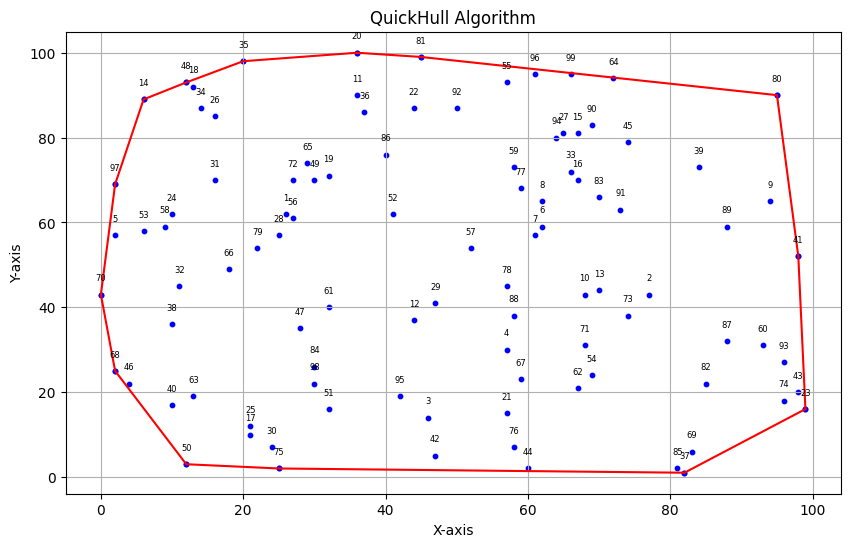

Convex Hull Points:
point 81 [45, 99]
point 20 [36, 100]
point 35 [20, 98]
point 48 [12, 93]
point 14 [6, 89]
point 97 [2, 69]
point 70 [0, 43]
point 68 [2, 25]
point 50 [12, 3]
point 75 [25, 2]
point 37 [82, 1]
point 23 [99, 16]
point 41 [98, 52]
point 80 [95, 90]


In [46]:
# Εξάγουμε τις συντεταγμένες για την γραφική αναπαράσταση
x_coords = [point[0] for point in random_points]
y_coords = [point[1] for point in random_points]

# Μετρατροπή σημείων σε πίνακα NumPy για τους υπολογισμούς
points_array = np.array([[point[0], point[1]] for point in random_points])

# Υπολογισμός κυρτού περιβλήματος
hull = ConvexHull(points_array)
hull_indices = hull.vertices
convex_hull_points = points_array[hull_indices]

# Γραφική αναπαράσταση σημείων και κυρτού περιβλήματος
plt.figure(figsize=(10,6))
plt.scatter(x_coords, y_coords, s=10, marker='o', c='blue')
for i, name in enumerate(names):
    plt.annotate(name, (x_coords[i], y_coords[i]), textcoords="offset points", xytext=(0,10), ha='center', fontsize=6)


plt.scatter(convex_hull_points[:, 0], convex_hull_points[:, 1], s=10, color='blue', label='Convex Hull Points')
plt.plot(convex_hull_points[:, 0], convex_hull_points[:, 1], 'r-')

# Συνδέουμε το τελευταίο με το πρώτο σημείο για να ολοκληρώσουμε το πολύγωνο
plt.plot([convex_hull_points[-1, 0], convex_hull_points[0, 0]],
         [convex_hull_points[-1, 1], convex_hull_points[0, 1]], 'r-')

plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.title('QuickHull Algorithm')
plt.grid(True)
plt.show()

print('Convex Hull Points:')
for point in result:
    print('point', point[2], point[:2])

##(β΄) Συγκρίνουμε τους αλγορίθμους ως προς το χρόνο υλοποίησής τους και παρουσιάζουμε τα αποτελέσματα

In [47]:
import time
import pandas as pd

# Λίστες αποτελεσμάτων χρονομέτρησης
incremental_times = []
jarvis_times = []
divide_times = []
quickhull_times = []

# Χρονομέτρηση Αυξητικού αλγορίθμου για 10-100 σημεία
for i in range(10, 101, 10):
    random_points = generate_random_points(i, x_min, x_max, y_min, y_max)
    start_time = time.time()
    result = incremental_algorithm(random_points)
    end_time = time.time()
    elapsed_time = end_time - start_time
    incremental_times.append(elapsed_time)

# Χρονομέτρηση αλγορίθμου Περιτυλίγματος για 10-100 σημεία
for i in range(10, 101, 10):
    random_points = generate_random_points(i, x_min, x_max, y_min, y_max)
    start_time = time.time()
    result = jarvis_march(random_points)
    end_time = time.time()
    elapsed_time = end_time - start_time
    jarvis_times.append(elapsed_time)

# Χρονομέτρηση αλγορίθμου Διαίρει και Βασίλευε για 10-90 σημεία
for i in range(10, 101, 10):
    random_points = generate_random_points(i, x_min, x_max, y_min, y_max)
    start_time = time.time()
    result = divide(random_points)
    end_time = time.time()
    elapsed_time = end_time - start_time
    divide_times.append(elapsed_time)

# Χρονομέτρηση αλγορίθμου QuickHull για 10-100 σημεία
for i in range(10, 101, 10):
    random_points = generate_random_points(i, x_min, x_max, y_min, y_max)
    start_time = time.time()
    points_array = np.array([[point[0], point[1]] for point in random_points])
    result = ConvexHull(points_array)
    hull_indices = result.vertices
    convex_hull_points = points_array[hull_indices]
    end_time = time.time()
    elapsed_time = end_time - start_time
    quickhull_times.append(elapsed_time)

# Εισαγωγή δεδομένων σε dataframe
data_dict = {
    'For Points': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100],
    'Incremental': incremental_times,
    'Jarvis March': jarvis_times,
    'Divide and Conquer': divide_times,
    'QuickHull': quickhull_times
}

df = pd.DataFrame(data_dict)
df = df.style.set_properties(**{'text-align': 'center'})

df

##(γ΄) Οπτικοποίηση των βημάτων για κατασκευή κυρτού περιβλήματος με αλγόριθμο περιτυλίγματος

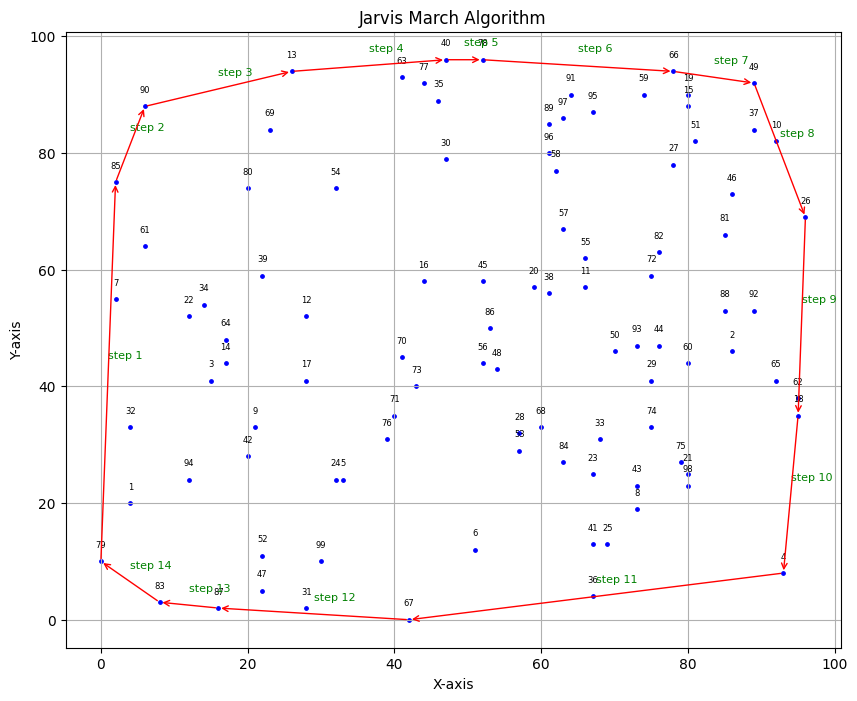

Convex Hull steps:
point 79 -> point 85 -> point 90 -> point 13 -> point 40 -> point 78 -> point 66 -> point 49 -> point 26 -> point 18 -> point 4 -> point 67 -> point 87 -> point 83


In [48]:
# Αλγόριθμος περιτυλίγματος
result = jarvis_march(random_points)

# Εξάγουμε συντεταγμένες από τα σημεία
x_coords, y_coords, names = zip(*random_points)

# Σχηματίζουμε τη γραφική

# Ονοματίζουμε άξονες και τίτλο
plt.figure(figsize=(10,8))
plt.scatter(x_coords, y_coords, s=6, c='blue', marker='o')
for i, name in enumerate(names):
    plt.annotate(name, (x_coords[i], y_coords[i]), textcoords="offset points", xytext=(0,10), ha='center', fontsize=6)


# Εξάγουμε τις συντεταγμένες των σημείων του κυρτού περιβλήματος
result_x = [point[0] for point in result]
result_y = [point[1] for point in result]
result_names = [point[2] for point in result]

# Σχεδιάζουμε τις γραμμές του περιβλήματος
result_x.append(result_x[0])
result_y.append(result_y[0])
result_names.append(result_names[0])

for i in range(len(result_x) - 1):
    # Calculate the midpoint of the line segment
    mid_x = (result_x[i] + result_x[i + 1]) / 2
    mid_y = (result_y[i] + result_y[i + 1]) / 2

    # Annotate the midpoint with a title
    plt.annotate(f"step {i + 1}", (mid_x, mid_y), textcoords="offset points", xytext=(0, 10), ha='left', fontsize=8,
                 color='green')

    # Draw the arrow
    plt.annotate("", xy=(result_x[i + 1], result_y[i + 1]), xytext=(result_x[i], result_y[i]),
                 arrowprops=dict(arrowstyle="->", color="red"))

# Εμφάνιση γραφικής
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.title('Jarvis March Algorithm')
plt.grid(True)
plt.show()

print('Convex Hull steps:')
for index, point in enumerate(result):
    if index < len(result) - 1:
        print('point', point[2], end=' -> ')
    else:
        print('point', point[2])
        break

## 2) Θεωρούμε 80 σημεία στον χώρο $R^3$ και εφαρμόζουμε QuickHull για κατασκευή κυρτού περιβλήματος

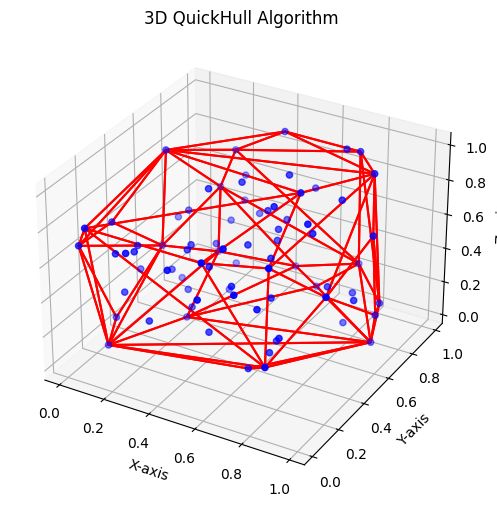

In [49]:
# Δημιουργούμε τα 80 τυχαία σημεία
num_points = 80
np.random.seed(0)  # For reproducibility
points3d = np.random.rand(num_points, 3)

# Υπολογίζουμε το κυρτό περίβλημα
convex_hull = ConvexHull(points3d)

fig = plt.figure(figsize=(10,6))
ax = fig.add_subplot(111, projection='3d')

# Γραφική αναπαράσταση όλων των σημείων
ax.scatter(points3d[:, 0], points3d[:, 1], points3d[:, 2], c='b', marker='o', label='Random Points')

# Γραφική αναπαράσταση του κυρτού περιβλήματος
for simplex in convex_hull.simplices:
    simplex = np.append(simplex, simplex[0])
    ax.plot(points3d[simplex, 0], points3d[simplex, 1], points3d[simplex, 2], 'r-')

ax.set_xlabel('X-axis')
ax.set_ylabel('Y-axis')
ax.set_zlabel('Z-axis')
ax.set_title('3D QuickHull Algorithm')
plt.show()

## 3) Γενίκευση Αλγορίθμων σε d-διαστάσεις.
###   Αυξητικός Αλγόριθμος

Το κυρτό περίβλημα είναι ένα κυρτό πολύτοπο d-διαστάσεων. Αναφερόμαστε στις όψεις d−1 διαστάσεων του πολύτοπου ως **έδρες**, και στις όψεις d−2 διαστάσεων ως **ράχες**. Για τα σημεία στη γενική θέση, κάθε έδρα είναι ένα προσανατολισμένο d-simplex (που ορίζεται από d σημεία) και κάθε ράχη
είναι ένα (d − 1)-simplex (ορίζεται από d − 1 μονάδες). Οι έδρες έχουν
προσανατολισμό προς τα πάνω (με την όψη προς τα έξω) ή προς τα κάτω (με την όψη προς τα μέσα), με καθεμία να ορίζει έναν ημιχώρο σε d διαστάσεις, με υπερεπίπεδο διαστάσεων (d − 1) ορισμένο από τα σημεία του. Ένα σημείο είναι **ορατό** από μια έδρα εάν βρίσκεται στο ανοιχτό μισό διάστημα που ορίζεται από την έδρα. Μια ράχη προσπίπτει σε ακριβώς 2 έδρες του ίδιου προσανατολισμού. Μια έδρα προσπίπτει σε d ράχες. \\
Για να μοντελοποιήσουμε κυρτά περιβλήματα d-διάστάσεων σε γενική θέση ως χώρο διαμόρφωσης, τα αντικείμενα X είναι το σύνολο των σημείων εισόδου και
κάθε διαμόρφωση αντιστοιχεί σε μια πιθανή έδρα. Συγκεκριμένα, κάθε υποσύνολο d σημείων ορίζει δύο έδρες, μια προσανατολισμένη προς τα πάνω και μία προσανατολισμένη προς τα κάτω. Η διαμόρφωση που αντιστοιχεί σε μια έδρα θα έρχεται σε σύγκρουση με σημεία ορατά από αυτή την έδρα. Επομένως, οι δύο διαμορφώσεις θα έχουν συμπληρωματικά σύνολα σύγκρουσης (εκτός από το
καθοριστικά σημεία, τα οποία δεν βρίσκονται σε κανένα σύνολο σύγκρουσης). Ο χώρος διαμόρφωσης έχει μέγιστο βαθμό d και πολλαπλότητα 2. \\
Όταν προσθέτουμε ένα σημείο p στο κυρτό περίβλημα (ή στον αντίστοιχο χώρος διαμόρφωσης), αφαιρούμε όλες τις ορατές από το p έδρες. Αυτές οι έδρες είναι γειτονικές και η περιοχή που αφαιρείται αφήνει ένα απλά συνδεδεμένο σύνορο ραχών. Το νέο κυρτό περίβλημα με το p είναι τότε, το παλιό περίβλημα χωρίς τις ορατές έδρες, με μία νέα έδρα από κάθε ράχη προς το p. Αυτό οδηγεί
στον τυπικό αυξητικό αλγόριθμο για κυρτά περιβλήματα που δίνεται από τον παρακάτω αλγόριθμο.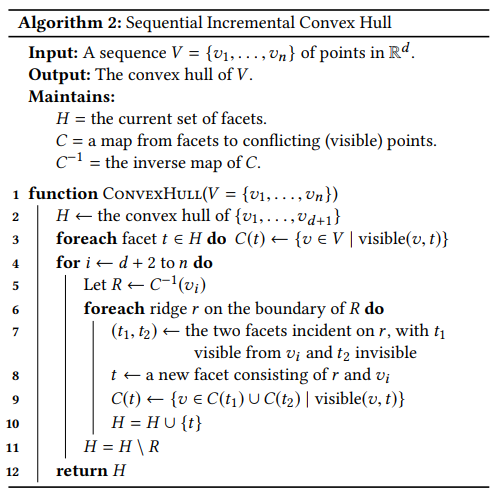 \\
Πηγή: https://dspace.mit.edu/bitstream/handle/1721.1/146241/3350755.3400255.pdf

### Αλγόριθμος περιτύλιξης (Jarvis March)
* Έστω n σημεία του $R^d$ που βρίσκονται σε γενική θέση (δηλαδή, κάθε d σημεία ορίζουν υπερεπίπεδο, κάθε d+1 σημεία δεν ανήκουν στο ίδιο υπερεπίπεδο).
* Είναι ένας αυξητικός αλγόριθμος ως προς τις έδρες: το σύνολο των γνωστών εδρών είναι συνεκτικό (άρα και το σύνολο των άγνωστων εδρών είναι συνεκτικό).
* Ο αλγόριθμος τηρεί μία δομή δεδομένων, την PAX, η οποία περιέχει όλες τις γνωστές ράχες που πρέπει να εξετασθούν, δηλαδή ράχες για τις οποίες γνωρίζουμε μία έδρα, αλλά όχι την άλλη έδρα (κάθε ράχη περιέχεται ακριβώς σε δύο έδρες).
* Οι ράχες αποθηκέυονται ως (F \ {x}, x), όπου: \\
F: είναι τα d σημεία που ορίζουν μία (γνωστή) έδρα που περιέχει τη ράχη, \\
x: η κορυφή της έδρας F που δεν ανήκει στη ράχη, \\
F \ {x}: οι κορυφές της ράχης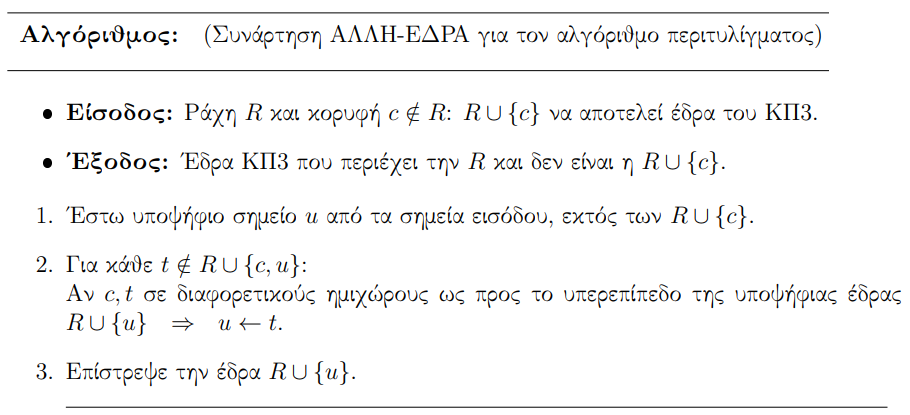 \\
Πηγή: Σύνολο διαφανειών 03 - Κυρτό περίβλημα σε περισσότερες διαστάσεις

### Αλγόριθμος Διαίρει και Βασίλευε

### Αλγόριθμος QuickHull
Ο Quickhull χρησιμοποιεί δύο γεωμετρικές πράξεις: προσανατολισμένο υπερεπίπεδο μέσω d σημείων και προσημασμένη απόσταση από το υπερεπίπεδο. Αναπαριστά ένα υπερεπίπεδο με το μοναδιαίο κανονικό διάνυσμα με κατεύθυνση προς τα έξω και την μετατόπισή του από την αρχή των αξόνων. Η προσημασμένη απόσταση ενός σημείου από ένα υπερεπίπεδο είναι το εσωτερικό γινόμενο του σημείου και του κανονικού διανύσματος συν την μετατόπιση. Το υπερεπίπεδο ορίζει έναν ημιχώρο σημείων που
έχουν αρνητικές αποστάσεις από το υπερεπίπεδο. Εάν η απόσταση είναι θετική, το
το σημείο βρίσκεται πάνω από το υπερεπίπεδο. \\
Για την επεξεργασία ενός σημείου χρησημοποιούμε την απλοποίηση του Θεωρήματος Beneath-Beyond, σύμφωνα με το οποίο: \\
Έστω $H$ ένα κυρτό περίβλημα στον $R^d$ και έστω $p$ ένα σημείο στο $R^d - H$. Τότε $F$ θα είναι έδρα του $conv(p \cup H)$ αν και μόνο αν: \\
1.   $F$ είναι έδρα του $H$ και το $p$ είναι κάτω από την $F$ ή
2.   $F$ δεν είναι έδρα του $H$ και οι κορυφές του είναι το $p$ και οι κορυφές μίας ράχης του $H$ με μία προσπίπτουσα έδρα κάτω από το $p$ και την άλλη προσπίπτουσα έδρα πάνω από το $p$. \\

Το βασικό πρόβλημα του Beneath-Beyond είναι ο αποτελεσματικός προσδιορισμός των ορατών εδρών. Εφόσον μια έδρα συνδέεται με τους γείτονές της, ο εντοπισμός μιας ορατής έδρας επιτρέπει τον γρήγορο εντοπισμό των υπολοίπων. Στον QuickHull, μετά την αρχικοποίηση θα εκχωρείται κάθε μη επεξεργασμένο σημείο σε ένα εξωτερικό σύνολο. Εξ ορισμού, η αντίστοιχη έδρα θα είναι ορατή από το σημείο. Όταν ο QuickHull δημιουργεί έναν κώνο νέων εδρών, δημιουργεί νέα εξωτερικά σύνολα από τα εξωτερικά σύνολα των ορατών όψεων. Αυτή η διαδικασία ονομάζεται "partitioning" και εντοπίζει μία ορατή νέα έδρα για κάθε σημείο. Αν ένα σημείο βρίσκετα πάνω από πολλές νέες έδρες, τότε μία από τις νέες έδρες επιλέγεται. Αν βρίσκεται κάτω από όλες τις νέες έδρες, τότε το σημείο βρίσκεται εντός του κυρτού περιβλήματος και μπορεί να απορριφθεί. Μέσω του "partitioning" καταγράφεται επίσης το πιο απομακρυσμένο σημείο κάθε εξωτερικού συνόλου. \\
O QuickHull επιλέγει ένα μη εκφυλισμένο σύνολο σημείων για το αρχικό simplex. Αν είναι εφικτό, επιλέγει σημεία με μέγιστη ή ελάχιστη τετμημένη.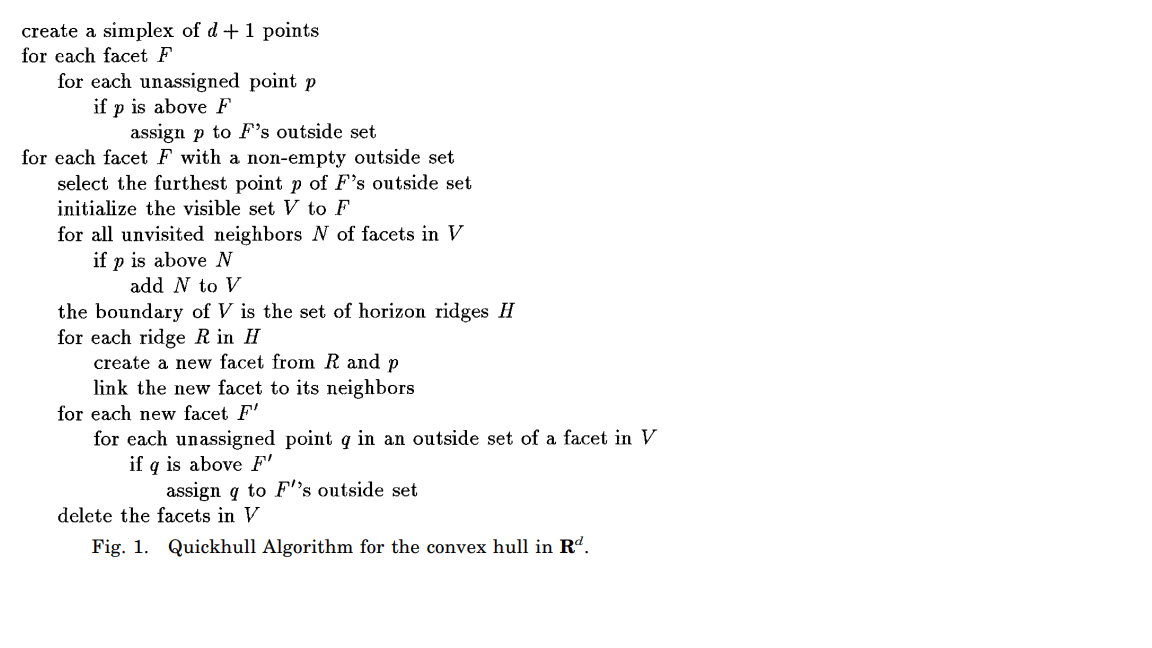 \\
Πηγή: https://www.cise.ufl.edu/~ungor/courses/fall06/papers/QuickHull.pdf

#**Υλοποίηση Β**
Έστω P ένα σύνολο n σημείων στο επίπεδο. Να υλοποιήσετε έναν αλγόριθμο ορθογώνιας γεωμετρικής αναζήτησης για το σύνολο σημείων P.

In [50]:
# Αριθμός διαστάσεων
k = 2

# Αναπαράσταση κόμβου του kd-tree
class Node:
    def __init__(self, point):
        self.point = point
        self.left = None
        self.right = None

# Δημιουργία κόμβου
def newNode(point):
    return Node(point)

# Εισάγει έναν νέο κόμβο και επιστρέφει τη ρίζα του τροποποιημένου δέντρου
def insertRec(root, point, depth):
    # Αν το δέντρο δεν είναι άδειο
    if not root:
        return newNode(point)

    # Υπολογισμός τρέχουσας διάστασης σύγκρισης
    cd = depth % k

    # Συγκρίνουμε το νέο σημείο με τη ρίζα στην τρέχουσα διάσταση
    # και αποφασίζουμε αν πάει στο αριστερό ή το δεξί υποδέντρο
    if point[cd] < root.point[cd]:
        root.left = insertRec(root.left, point, depth + 1)
    else:
        root.right = insertRec(root.right, point, depth + 1)

    return root

# Συνάρτηση για την εισαγωγή ενός νέου σημείου με ένα δεδομένο σημείο του
# KD Tree και επιστροφή της νέας ρίζας. Καλεί την συνάρτηση insertRec()
def insert(root, point):
    return insertRec(root, point, 0)

# Συνάρτηση προσδιορισμού αν δύο σημεία είναι ίδια σε χώρο Κ διαστάσεων
def arePointsSame(point1, point2):
    # Σύγκριση μεμονωμένων συντεταγμένων
    for i in range(k):
        if point1[i] != point2[i]:
            return False

    return True

# Αναζήτηση ενός σημείου στο KD tree
def searchRec(root, point, depth):
    if not root:
        return False
    if arePointsSame(root.point, point):
        return True

    # Η τρέχουσα διάσταση υπολογίζεται χρησιμοποιώντας το τρέχον βάθος
    # και τις συνολικές διαστάσεις (k)
    cd = depth % k

    # Σύγκριση του σημείου με τη ρίζα ως προς τη τρέχουσα διάσταση
    if point[cd] < root.point[cd]:
        return searchRec(root.left, point, depth + 1)

    return searchRec(root.right, point, depth + 1)

# Αναζήτηση σημείου στο KD tree
def search(root, point):
    # Αρχικό τρέχον βάθος 0
    return searchRec(root, point, 0)

#**Εφαρμογή Β**
Θεωρούμε ένα σύνολο P 70 σημείων στο επίπεδο και μια ορθογώνια έκτααση. Καταγράφουμε τα σημεία του P που βρίσκονται εντός της ορθογώνιας έκτασης.

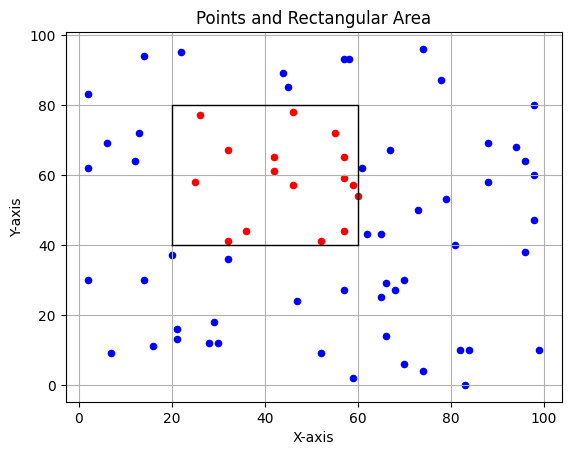

Points within the specified area: [(55.0, 72.0), (60.0, 54.0), (42.0, 65.0), (46.0, 78.0), (52.0, 41.0), (26.0, 77.0), (46.0, 57.0), (36.0, 44.0), (57.0, 44.0), (32.0, 41.0), (32.0, 67.0), (25.0, 58.0), (59.0, 57.0), (42.0, 61.0), (57.0, 59.0), (57.0, 65.0)]


In [51]:
np.random.seed(0)
points = [(round(np.random.uniform(0, 100), 0), round(np.random.uniform(0, 100), 0)) for _ in range(70)]

root = None
n = len(points)

for i in range(n):
    root = insert(root, points[i])

# Ορίζουμε την ορθογώνια περιοχή ως μια λίστα που περιέχει τις ελάχιστες
# και μέγιστες συντεταγμένες
area_rect = [(20, 40), (60, 80)]

# Αρχικοποιούμε τις λίστες που θα περιέχουν τα σημεία εντός και εκτός
# της περιοχής αντίστοιχα
points_within_area = []
points_outside_area = []

# Διατρέχουμε τα 70 σημείά και ελέγχουμε αν κάθε σημείο βρίσεκται εντός
# της περιοχής
for point in points:
    if search(root, point):
        x, y = point
        xmin, ymin = area_rect[0]
        xmax, ymax = area_rect[1]
        if xmin <= x <= xmax and ymin <= y <= ymax:
            points_within_area.append(point)
        else:
            points_outside_area.append(point)

# Διαχωρίζουμε τις συντεταγμένες από τα σημεία
x_within_area, y_within_area = zip(*points_within_area)
x_outside_area, y_outside_area = zip(*points_outside_area)

# Γραφική αναπαράσταση των σημείων
plt.scatter(x_within_area, y_within_area, label='Points within Area', color='red', s=20)
plt.scatter(x_outside_area, y_outside_area, label='Points outside Area', color='blue', s=20)

# Γραφική αναπαράσταση της ορθογώνιας περιοχής
rect_x = [area_rect[0][0], area_rect[1][0], area_rect[1][0], area_rect[0][0], area_rect[0][0]]
rect_y = [area_rect[0][1], area_rect[0][1], area_rect[1][1], area_rect[1][1], area_rect[0][1]]
plt.plot(rect_x, rect_y, label='Rectangular Area', color='black', linewidth=1)

plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.title('Points and Rectangular Area')
plt.grid(True)
plt.show()

# Εκτύπωση συντεταγμένων σημείων εντός της ορθογώνιας περιοχής
print("Points within the specified area:", points_within_area)

#**Εφαρμογή Γ:** Υπολογισμός κέντρου μάζας αστρικού σμήνους

Τα **αστρικά σμήνη** είναι ομάδες αστεριών που συνδέονται μεταξύ τους βαρυτικά και σχηματίζονται από το ίδιο μοριακό νέφος ή περιοχή του διαστήματος. Διακρίνονται σε δύο βασικούς τύπους: σφαιρωτά σμήνη και ανοιχτά σμήνη.

**Σφαιρωτά σμήνη**: Αυτά είναι πυκνά συσκευασμένα, κατά προσέγγιση σφαιρικά σμήνη που περιέχουν χιλιάδες έως εκατομμύρια αστέρια. Βρίσκονται συνήθως στις εξωτερικές περιοχές των γαλαξιών και είναι αρκετά παλιά, συχνά περιέχουν μερικά από τα παλαιότερα αστέρια του γαλαξία. Τα σφαιρωτά σμήνη είναι στενά συνδεδεμένα με τη βαρύτητα και έχουν υψηλή συγκέντρωση αστεριών προς τα κέντρα τους.

**Ανοικτά σμήνη**: Γνωστά και ως γαλαξιακά σμήνη, αυτά είναι λιγότερο στενά συνδεδεμένα και περιέχουν λιγότερα αστέρια σε σύγκριση με τα σφαιρωτά σμήνη. Τα ανοιχτά σμήνη είναι σχετικά νεαρά και συχνά βρίσκονται μέσα στο δίσκο ενός γαλαξία. Τείνουν να είναι λιγότερο πυκνά και έχουν μια πιο αραιή κατανομή αστεριών.

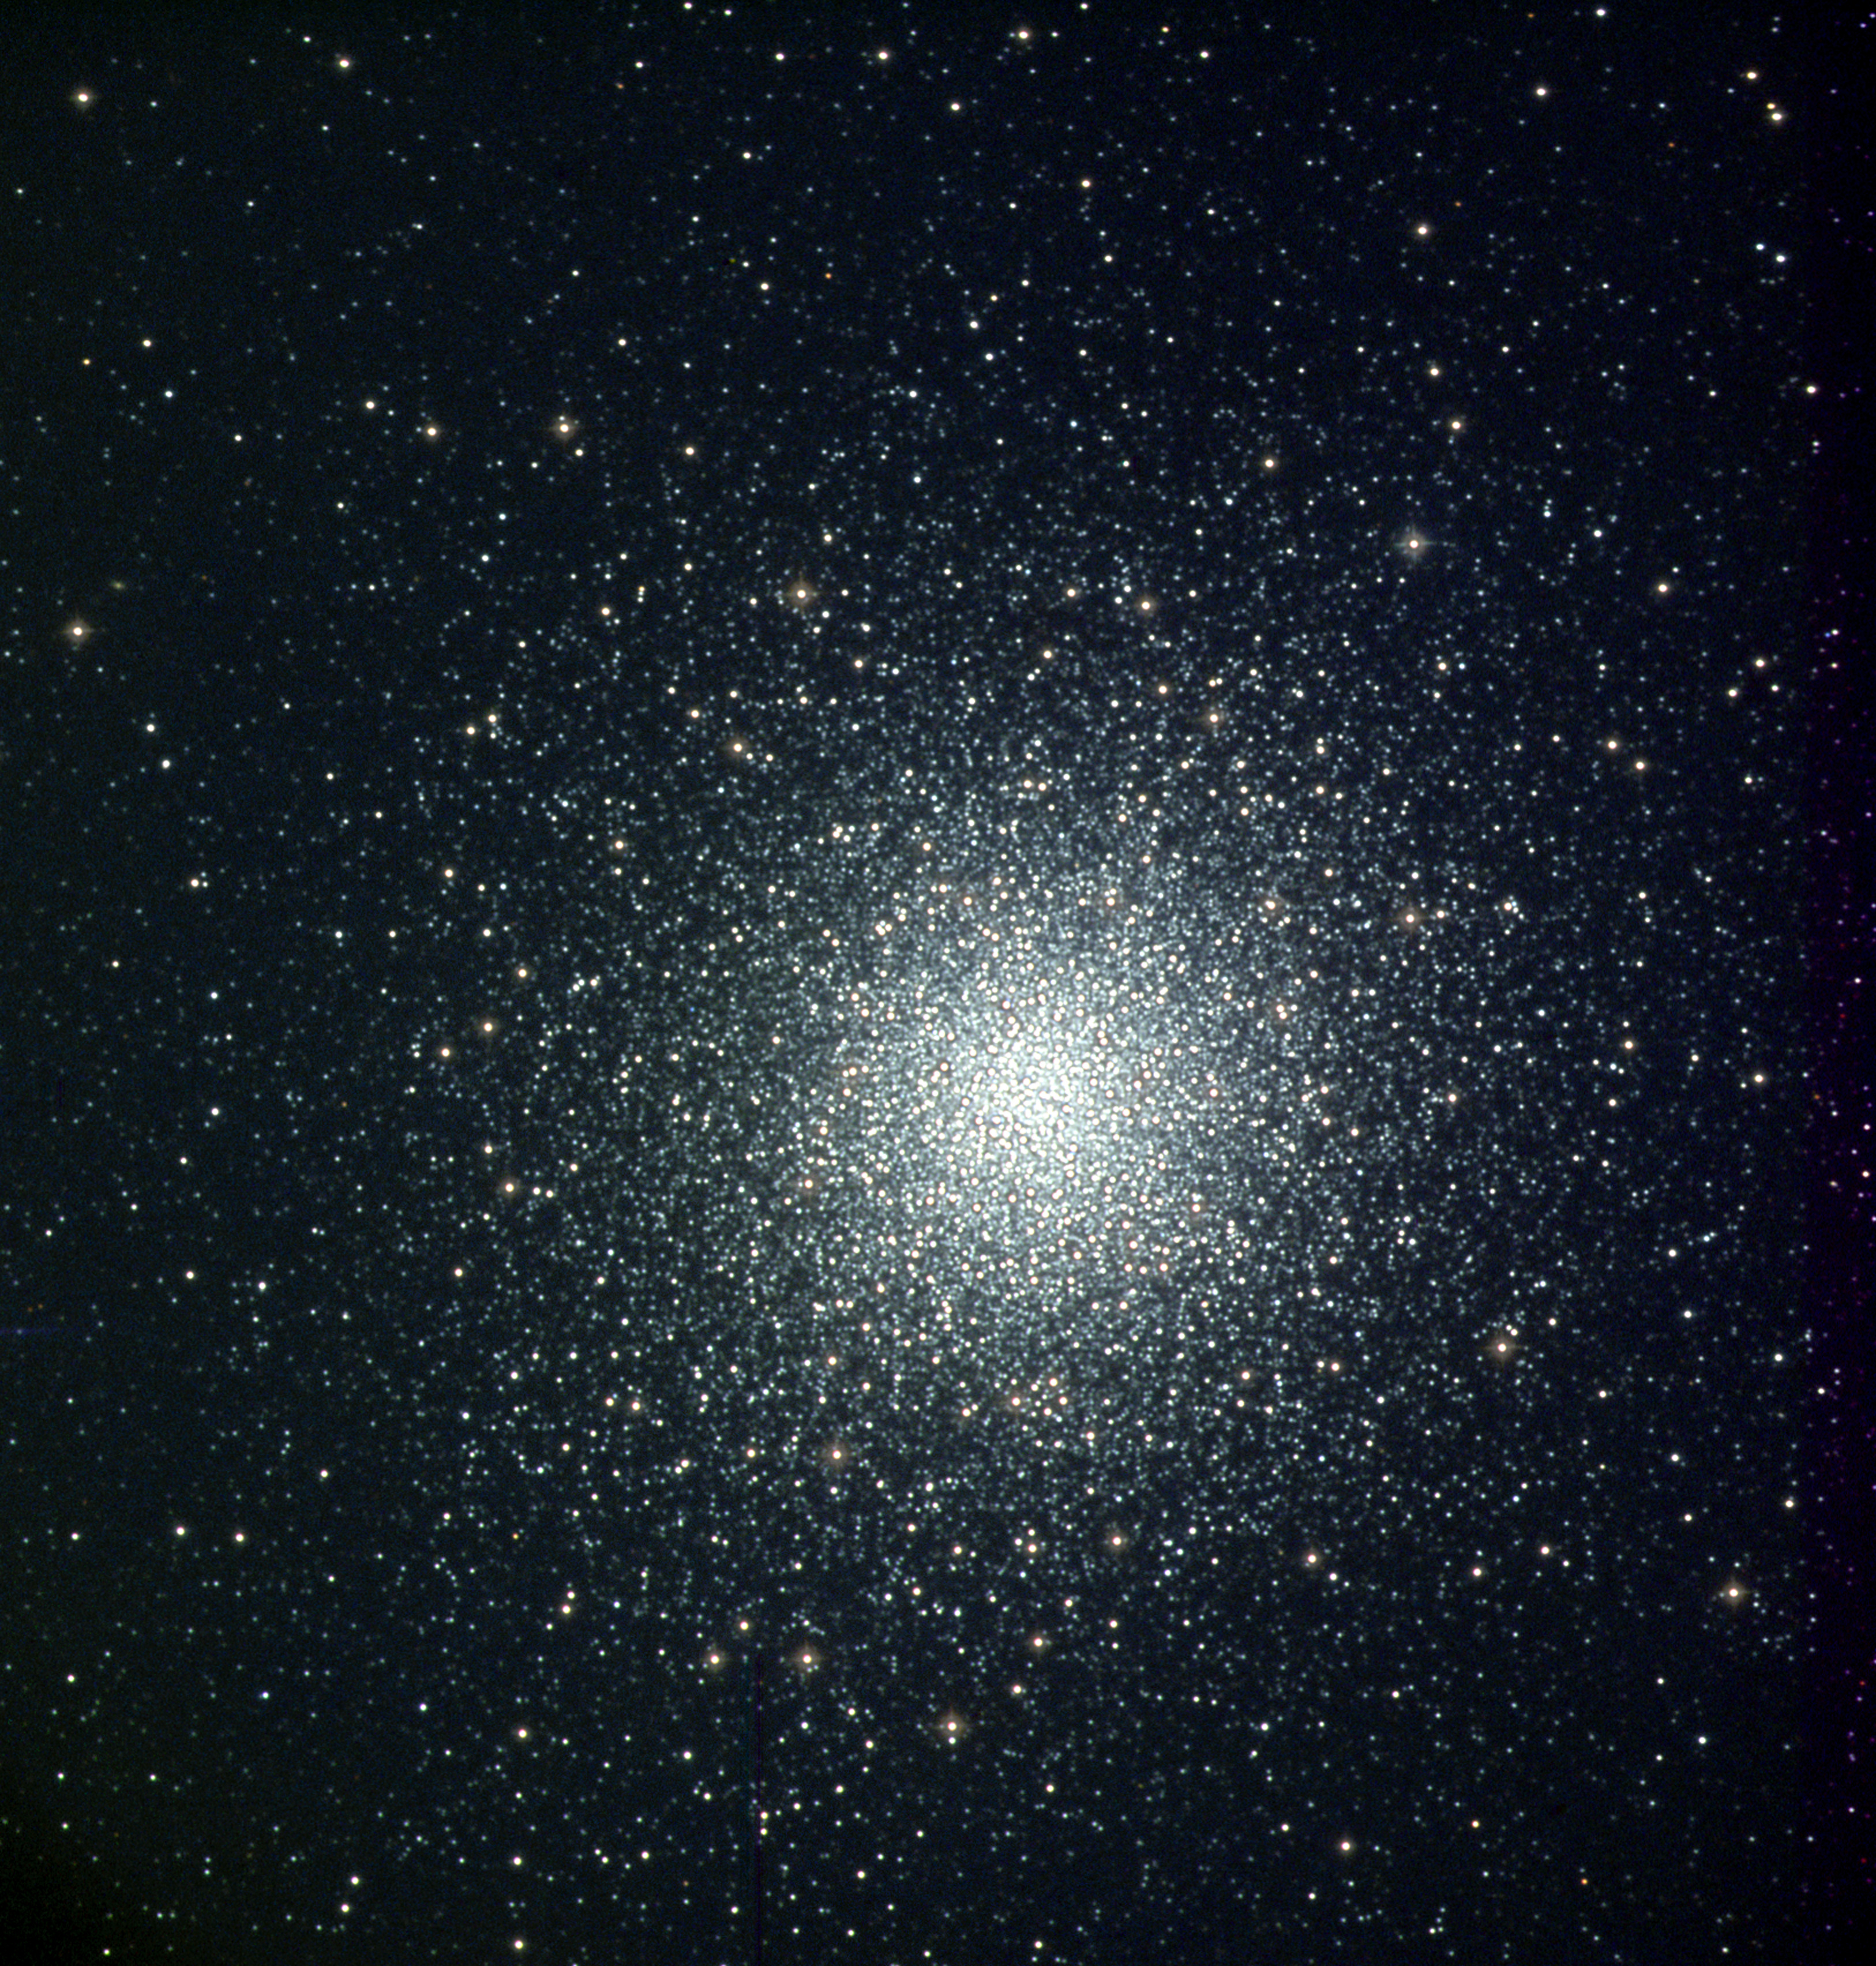

## Αστρονομική σημασία των αστρικών σμηνών
Τα αστρικά σμήνη είναι σημαντικά σε πολλούς τομείς της αστρονομίας. Επειδή όλοι οι αστέρες του καθενός γεννήθηκαν περίπου στο ίδιο χρονικό διάστημα, οι διαφορετικές ιδιότητες όλων των αστέρων σε ένα σμήνος είναι συνάρτηση μάζας μόνο και έτσι οι θεωρίες της αστρικής εξέλιξης βασίζονται σε παρατηρήσεις ανοιχτών και σφαιρικών σμηνών. \\
Τα σμήνη είναι επίσης ένα βήμα καίριας σημασίας για τον προσδιορισμό της κλίμακας αποστάσεων του Σύμπαντος. \\
Σχεδόν όλοι οι αστέρες στο γαλαξιακό πεδίο, συμπεριλαμβανομένου του Ήλιου, γεννήθηκαν αρχικώς σε περιοχές με ενσωματωμένα σμήνη που διασπάστηκαν. Αυτό σημαίνει ότι οι ιδιότητες των αστέρων και των πλανητικών συστημάτων μπορεί να έχουν επηρεαστεί από πρώιμα συγκεντρωμένα σε σμήνη περιβάλλοντα. Αυτό φαίνεται να συμβαίνει για το δικό μας Ηλιακό Σύστημα, στο οποίο η χημική αφθονία δείχνει τις επιπτώσεις ενός υπερκαινοφανούς από κοντινό αστέρα στις αρχές της ιστορίας του Ηλιακού Συστήματος.

## Η αξία του κέντρου μάζας ενός αστρικού σμήνους
Το κέντρο μάζας ενός αστρικού σμήνους είναι κρίσιμο για την κατανόηση της δυναμικής και της εξέλιξής του. Το κέντρο μάζας είναι το σημείο γύρω από το οποίο ισορροπεί η συνολική μάζα του σμήνους, λαμβάνοντας υπόψη τις θέσεις και τις μάζες όλων των αστεριών μέσα στο σμήνος. Αυτό το κέντρο μάζας παίζει σημαντικό ρόλο για διάφορους λόγους:

* ***Βαρυτικές αλληλεπιδράσεις***: Η κίνηση και οι αλληλεπιδράσεις των άστρων μέσα σε ένα σμήνος επηρεάζονται από τις βαρυτικές δυνάμεις που ασκούνται από όλα τα άλλα αστέρια. Το κέντρο μάζας χρησιμεύει ως σημείο αναφοράς γύρω από το οποίο συμβαίνουν αυτές οι βαρυτικές αλληλεπιδράσεις. Βοηθά στον προσδιορισμό του τρόπου με τον οποίο κινούνται τα αστέρια μέσα στο σμήνος και μπορεί να οδηγήσει σε διάφορα φαινόμενα, όπως η ανταλλαγή αστεριών μεταξύ δυαδικών συστημάτων ή ακόμα και οι εκτοξεύσεις από το σμήνος λόγω στενών συναντήσεων.

* ***Εξέλιξη συστάδων***: Το κέντρο μάζας επηρεάζει τη συνολική εξέλιξη του σμήνους. Με την πάροδο του χρόνου, οι βαρυτικές αλληλεπιδράσεις αναγκάζουν τα αστέρια να κινούνται και μπορεί να οδηγήσουν στη σταδιακή διάλυση του σμήνους. Το κέντρο μάζας παρέχει πληροφορίες για τη μακροπρόθεσμη συμπεριφορά του σμήνους και εάν τελικά θα διασκορπιστεί ή θα παραμείνει δεσμευμένο.

* ***Αστρική Δυναμική***: Το κέντρο μάζας συνδέεται με τη συνολική κίνηση του σμήνους μέσα στο διάστημα. Η ταχύτητα, η επιτάχυνση και η τροχιά του σμήνους καθορίζονται με βάση την κατανομή των μαζών γύρω από το κέντρο μάζας. Αυτές οι πληροφορίες μας βοηθούν να κατανοήσουμε την κίνηση του σμήνος μέσα στον "οικοδεσπότη" γαλαξία του και τις πιθανές αλληλεπιδράσεις του με άλλα αντικείμενα.

* ***Εκτίμηση μάζας***: Μελετώντας την κίνηση των άστρων μέσα σε ένα σμήνος και λαμβάνοντας υπόψη το κέντρο μάζας, οι αστρονόμοι μπορούν να υπολογίσουν τη συνολική μάζα του σμήνος. Αυτό παρέχει πολύτιμες πληροφορίες σχετικά με την ποσότητα μάζας που περιέχεται στο σμήνος, συμπεριλαμβανομένων τόσο των ορατών αστεριών όσο και οποιασδήποτε σκοτεινής ύλης που μπορεί να υπάρχει.

## Μοντελοποίηση του υπολογισμού του κέντρου μάζας
Θεωρούμε 1000 τυχαία σημεία στον χώρο, τα οποία αντιπροσωπεύουν τα άστρα του σφαιρωτού σμήνους που εξετάζουμε. Για λόγους απλώτητας, θεωρούμε πως το σύνολο των σημείων είναι ήδη εκκαθαρισμένο από ακραίες τιμες (καλούμε συνάρτηση ομοιόμορφης κατανομής). \\
Η μέθοδος για τον υπολογισμό του κέντρου μάζας που θα ακολουθήσουμε βασίζεται στον αλγόριθμο QuickHull για 3 διαστάσεις, όπως αυτός υλοποιείται από την συνάρτηση ConvexHull της Python. \\
Συγκεκριμένα, αφού προσδιορίσουμε τις κορυφές του κυρτού περιβλήματος, υπολογίζουμε το αριθμητικό μέσο των συντεταγμένων αυτών των κορυφών. Αυτό γίνεται σε κάθε μία διάσταση ανεξάρτητα. \\
Τέλος, σχηματίζουμε τις γραφικές παραστάσεις που υποδεικνύουν τον υπολογισμό του κέντρου μάζας.

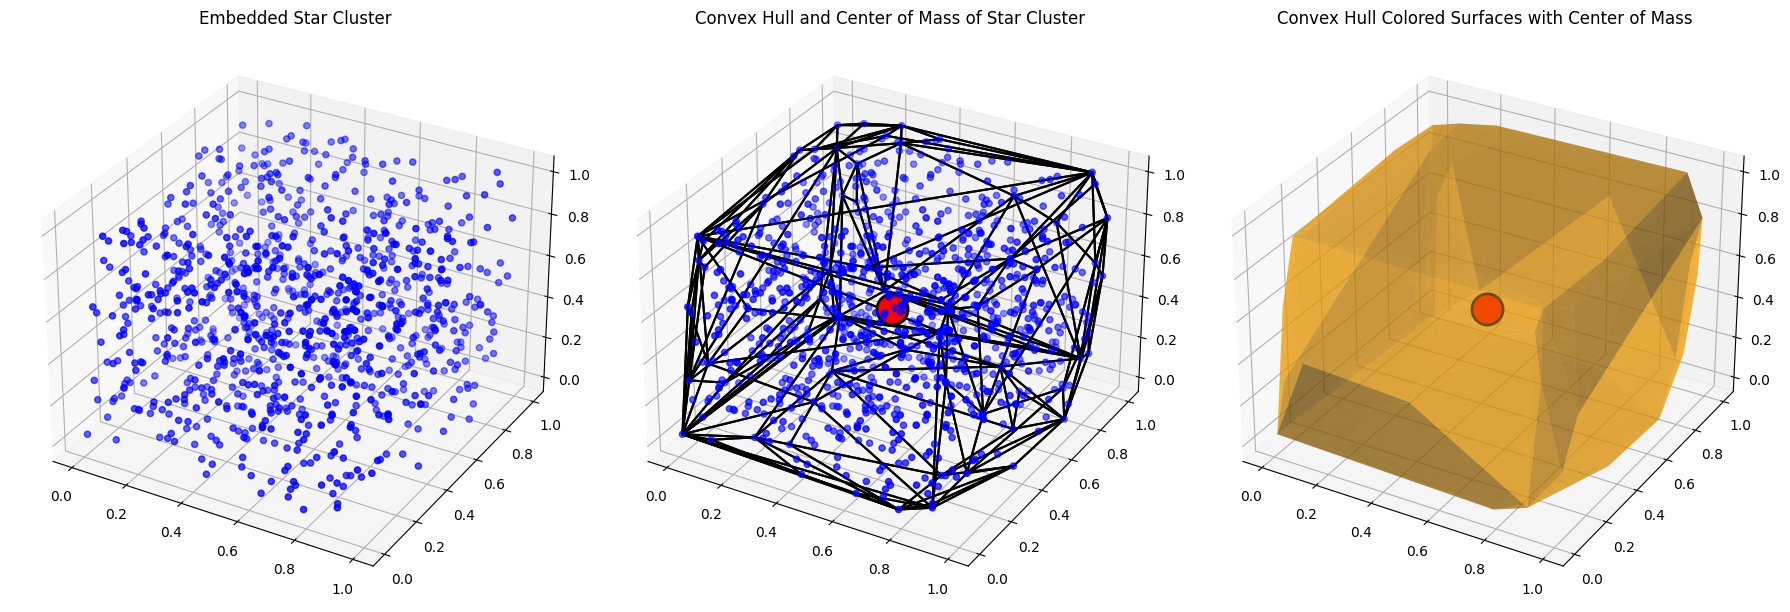

In [52]:
from mpl_toolkits.mplot3d.art3d import Poly3DCollection, Line3DCollection

# Δημιουργούμε 1000 τρισδιάστατα σημεία
np.random.seed(10)
points = np.random.rand(1000, 3)

# Υπολογίζουμε το κυρτό περίβλημα
hull = ConvexHull(points)

# Υπολογίζουμε τα κέντρα βάρους
cx = np.mean(hull.points[hull.vertices, 0])
cy = np.mean(hull.points[hull.vertices, 1])
cz = np.mean(hull.points[hull.vertices, 2])

fig = plt.figure(figsize=(18, 6))
# Γραφική αναπαράσταση σημείων
ax1 = fig.add_subplot(131, projection='3d')
ax1.scatter(points[:, 0], points[:, 1], points[:, 2], c='b', marker='o')
ax1.set_title('Embedded Star Cluster')

# Γραφική αναπαράσταση κυρτού περιβλήματος και κέντρου μάζας
ax2 = fig.add_subplot(132, projection='3d')
for simplex in hull.simplices:
    simplex = np.append(simplex, simplex[0])  # Σύνδεση πρώτου και τελευταίου σημείου
    vertices = points[simplex]
    ax2.plot(vertices[:, 0], vertices[:, 1], vertices[:, 2], 'k-')
ax2.scatter(points[:, 0], points[:, 1], points[:, 2], c='b', marker='o')
ax2.scatter(cx, cy, cz, c='red', marker='o', s=500, edgecolors='black', linewidths=2)
ax2.set_title('Convex Hull and Center of Mass of Star Cluster')

# Γραφική αναπαράσταση του κυρτού περιβλήματος με χρωματισμένες επιφάνειες
ax3 = fig.add_subplot(133, projection='3d')
for simplex in hull.simplices:
    simplex = np.append(simplex, simplex[0])  # Σύνδεση πρώτου και τελευταίου σημείου
    vertices = points[simplex]
    ax3.plot_trisurf(vertices[:, 0], vertices[:, 1], vertices[:, 2], color='orange', alpha=0.5)
ax3.scatter(cx, cy, cz, c='red', marker='o', s=500, edgecolors='black', linewidths=2)
ax3.set_title('Convex Hull Colored Surfaces with Center of Mass')

# Εμφάνιση γραφικών
plt.tight_layout()
plt.show()